In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [14]:
data=pd.read_csv('gold_price_data.csv')
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [15]:
data.dtypes

Date        object
SPX        float64
GLD        float64
USO        float64
SLV        float64
EUR/USD    float64
dtype: object

In [16]:
label_encoder = LabelEncoder()
data['Date'] = label_encoder.fit_transform(data['Date'])
print(data)

      Date          SPX         GLD        USO      SLV   EUR/USD
0       70  1447.160034   84.860001  78.470001  15.1800  1.471692
1      152  1447.160034   85.570000  78.370003  15.2850  1.474491
2      174  1411.630005   85.129997  77.309998  15.1670  1.475492
3      198  1416.180054   84.769997  75.500000  15.0530  1.468299
4      206  1390.189941   86.779999  76.059998  15.5900  1.557099
...    ...          ...         ...        ...      ...       ...
2285  1615  2671.919922  124.589996  14.060000  15.5100  1.186789
2286  1621  2697.790039  124.330002  14.370000  15.5300  1.184722
2287  1459  2723.070068  125.180000  14.410000  15.7400  1.191753
2288  1485  2730.129883  124.489998  14.380000  15.5600  1.193118
2289  1496  2725.780029  122.543800  14.405800  15.4542  1.182033

[2290 rows x 6 columns]


In [17]:
X=data.drop(columns=['GLD'])
y=data['GLD']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg_model = RandomForestRegressor(n_estimators=100,random_state=101)
reg_model.fit(X_train,y_train)
y_pred = reg_model.predict(X_test)

In [19]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Abosulte Error is {mae}")

Mean Abosulte Error is 1.0608099887991258


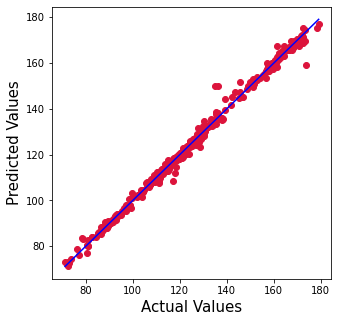

In [20]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, c='crimson')
p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2],c='blue')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.show()

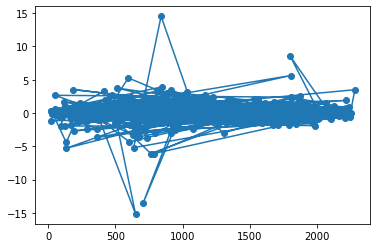

In [21]:
g=plt.plot(y_test - y_pred,marker='o',linestyle='-')